In [2]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from sympy import *
init_printing()

### Probabilities and Expectations ###
A function $f$ on the plane is called a *joint density* if:
- $f(x, y) \ge 0$ for all $x$, $y$
- $\int_x \int_y f(x, y)dydx = 1$

If you think of $f$ as a surface, then the first condition says that the surface is on or above the plane. The second condition says that the total volume under the surface is 1.

Think of probabilities as volumes under the surface, and define $f$ to be the *joint density of random variables $X$ and $Y$* if

$$
P((X, Y) \in A) ~ = ~ \mathop{\int \int}_A f(x,y)dydx ~~~~~ \text{for all } A
$$

That is, the chance that the random point $(X, Y)$ falls in the region $A$ is the volume under the joint density surface over the region $A$.

This is a two-dimensional analog of the fact that in probabilities involving a single random variable can be thought of as areas under the density curve.

### Infinitesimals ###
Also analogous is the interpretation of the joint density as an element in the calculation of the probability of an infinitesimal region.
![joint density matchstick](jt_density.png)
The infinitesimal region is a tiny rectangle in the plane just around the point $(x, y)$. Its width is $dx$ and its length is $dy$. The corresponding volume is that of a rectangular box whose base is the tiny rectangle and whose height is $f(x, y)$.

Thus for all $x$ and $y$,
$$
P(X \in dx, Y \in dy) ~ \sim ~ f(x, y)dxdy
$$

and the joint density measures *probability per unit area*:
$$
f(x, y) ~ \sim ~ \frac{P(X \in dx, Y \in dy)}{dxdy}
$$

An example will help us visualize all this. Let $f$ be defined as follows:

$$
f(x, y) ~ = ~ 
\begin{cases}
120x(y-x)(1-y), ~~~ 0 < x < y < 1 \\
0 ~~~~~~~~ \text{otherwise}
\end{cases}
$$

For now, just assume that this is a joint density, that is, it integrates to 1. Let's first take a look at what the surface looks like.

### Plotting the Surface ###
To do this, we will use a 3-dimensional plotting routine. First, we define the joint density function. For use in our plotting routine, this function must take $x$ and $y$ as its inputs and return the value $f(x, y)$ as defined above.

In [3]:
def joint(x,y):
    if y < x:
        return 0
    else:
        return 120 * x * (y-x) * (1-y)

Then we call `Plot_3d` to plot the surface. The arguments are the limits on the $x$ and $y$ axes, the name of the function to be plotted, and two optional arguments `rstride` and `cstride` that determine how many grid lines to use (larger numbers correspond to less frequent grid lines).

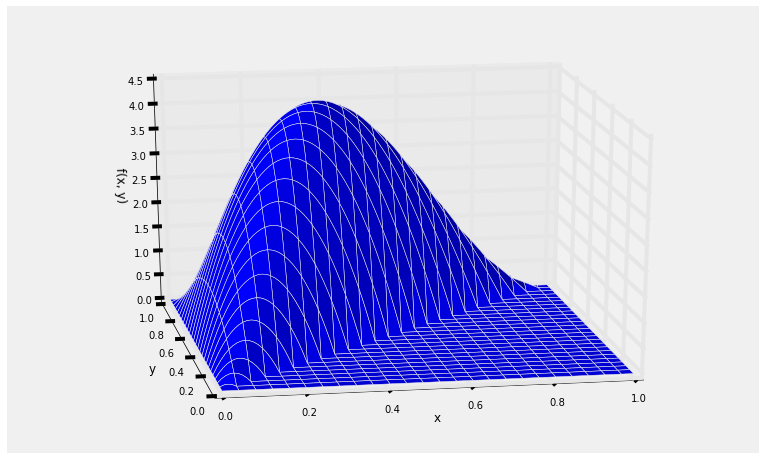

In [4]:
Plot_3d(x_limits=(0,1), y_limits=(0,1), f=joint, cstride=4, rstride=4)

You can see that the surface has level 0 in the lower right hand triangle. In fact, the possible values of $(X, Y)$ are as shown below. For calculations, we will frequently draw just the possible values and not the surface.

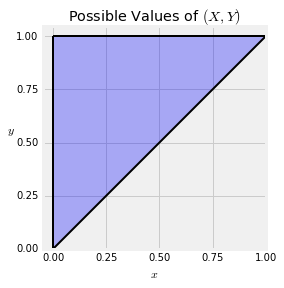

In [5]:
# HIDDEN
plt.plot([0, 0], [0, 1], color='k', lw=2)
plt.plot([0, 1], [0, 1], color='k', lw=2)
plt.plot([0, 1], [1, 1], color='k', lw=2)
xx = np.arange(0, 1.11, 0.1)
yy = np.ones(len(xx))
plt.fill_between(xx, xx, yy, alpha=0.3)
plt.xlim(-0.05, 1)
plt.ylim(0, 1.05)
plt.axes().set_aspect('equal')
plt.xticks(np.arange(0, 1.1, 0.25))
plt.yticks(np.arange(0, 1.1, 0.25))
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.title('Possible Values of $(X, Y)$');

### The Total Volume Under the Surface ###
First, it's a good idea to check that the total probability under the surface is equal to 1.
The function $f$ looks like a bit of a mess but it is easy to see that it is non-negative. Let's use `SymPy` to see that it integrates to 1. Done by hand, the integration is routine but tedious.

We will first declare the two variables to have values in the unit interval, and assign the function to the name `f`. This specification doesn't say that $x < y$, but we will enforce that condition when we integrate.

In [6]:
declare('x', interval=(0, 1))
declare('y', interval=(0, 1))
f = 120*x*(y-x)*(1-y)

To set up the double integral over the entire region of possible values, notice that $x$ goes from 0 to 1, and for each fixed value of $x$, the value of $y$ goes from $x$ to 1. 

We will fix $x$ and first integrate with respect to $y$. Then we will integrate $x$. The double integral requires a call to `Integral` that specifies the inner integral first and then the outer. The call says:
- The function being integrated is $f$.
- The inner integral is over the variable $y$ which goes from $x$ to 1.
- The outer integral is over the variable $x$ which goes from 0 to 1.

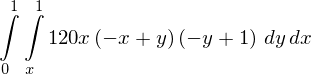

In [7]:
Integral(f, (y, x, 1), (x, 0, 1))

To evaluate the integral, use `doit()`:

In [8]:
Integral(f, (y, x, 1), (x, 0, 1)).doit()

### Probabilities as Volumes ###
Probabilities are volumes under the joint density surface; in other words, they are double integrals of the function $f$. For each probability, we have to first identify the region of integration, which we will do by geometry and by inspecting the event. Once we have set up the integral, we have to calculate its value, which we will do by `SymPy`.

#### Example 1. ####
Suppose you want to find $P(Y > 4X)$. The event is the blue region in the graph below.

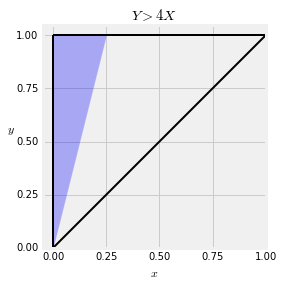

In [9]:
# HIDDEN
plt.plot([0, 0], [0, 1], color='k', lw=2)
plt.plot([0, 1], [0, 1], color='k', lw=2)
plt.plot([0, 1], [1, 1], color='k', lw=2)
xx = np.arange(0, 0.251, 0.05)
yy = np.ones(len(xx))
plt.fill_between(xx, 4*xx, yy, alpha=0.3)
plt.xlim(-0.05, 1)
plt.ylim(0, 1.05)
plt.axes().set_aspect('equal')
plt.xticks(np.arange(0, 1.1, 0.25))
plt.yticks(np.arange(0, 1.1, 0.25))
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.title('$Y > 4X$');

The volume under the density surface over this region is given by an integral specified analogously to the previous one: first the inner integral and then the outer.

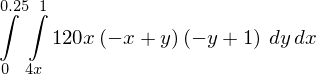

In [10]:
Integral(f, (y, 4*x, 1), (x, 0, 0.25))

In [11]:
Integral(f, (y, 4*x, 1), (x, 0, 0.25)).doit()

#### Example 2. ####
Suppose you want to find $P(X > 0.25, Y > 0.5)$. The event is the colored region below. 

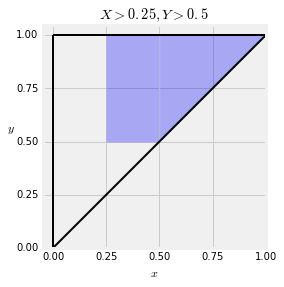

In [12]:
# HIDDEN
plt.plot([0, 0], [0, 1], color='k', lw=2)
plt.plot([0, 1], [0, 1], color='k', lw=2)
plt.plot([0, 1], [1, 1], color='k', lw=2)
xx = np.arange(0.25, .52, 0.05)
yy1 = 0.5*np.ones(len(xx))
yy2 = np.ones(len(xx))
plt.fill_between(xx, yy1, yy2, alpha=0.3)
xx = np.arange(0.5, 1.1, 0.1)
yy1 = 0.5*np.ones(len(xx))
yy2 = np.ones(len(xx))
plt.fill_between(xx, xx, yy2, alpha=0.3)
plt.xlim(-0.05, 1)
plt.ylim(0, 1.05)
plt.axes().set_aspect('equal')
plt.xticks(np.arange(0, 1.1, 0.25))
plt.yticks(np.arange(0, 1.1, 0.25))
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.title('$X > 0.25, Y > 0.5$');

Now $P(X > 0.25, Y > 0.5)$ is the integral of the joint density function over this region. Notice that for each fixed value of $y > 0.5$, the value of $x$ in this event goes from $0.25$ to $y$. So let's integrate $x$ first and then $y$.

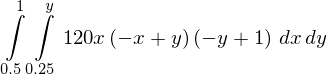

In [13]:
Integral(f, (x, 0.25, y), (y, 0.5, 1))

In [14]:
Integral(f, (x, 0.25, y), (y, 0.5, 1)).doit()

### Expectation ###
Let $g$ be a function on the plane. Then
$$
E(g(X, Y)) ~ = ~ \int_y \int_x g(x, y)f(x, y)dxdy 
$$
provided the integral exists, in which case it can be carried out in either order ($x$ first, then $y$, or the other way around).

This is the non-linear function rule for expectation, applied to two random variables with a joint density.

As an example, let's find $E(\frac{Y}{X})$ for $X$ and $Y$ with the joint density $f$ given in the examples above.

Here $g(x, y) = \frac{y}{x}$, and

\begin{align*}
E\big{(}\frac{Y}{X}\big{)} &= \int_y \int_x g(x, y)f(x, y)dxdy \\ \\
&= \int_0^1 \int_x^1 \frac{y}{x} 120x(y-x)(1-y)dy dx \\ \\
&= \int_0^1 \int_x^1 120y(y-x)(1-y)dy dx
\end{align*}

Now let's use `SymPy`. Remember that `x` and `y` have already been defined as symbolic variables with values in the unit interval.

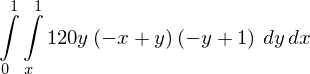

In [16]:
ev_y_over_x = Integral(120*y*(y-x)*(1-y), (y, x, 1), (x, 0, 1))
ev_y_over_x

In [17]:
ev_y_over_x.doit()

So for this pair of random variables $X$ and $Y$, we have 
$$
E\big{(}\frac{Y}{X}\big{)} = 3
$$